In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/DA - Internship/rfm.xlsx', sheet_name = 'ready_data')
df1.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,0,2950,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,...,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,1,3120,Lauree,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,Yes,...,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,2,402,Berne,Donegan,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,...,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,3,3135,Titus,Worsall,Male,83,Staff Scientist,Financial Services,Mass Customer,No,...,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,2339,Damien,Haddeston,Male,3,Web Designer II,Property,Affluent Customer,Yes,...,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/DA - Internship/rfm.xlsx', sheet_name = 'RFM')
df2.head()

,customer_id,Recency,Frequency,Monetary,RFM_Score
0,1,9,9,8,1.0
1,2,1,0,2,0.1
2,9,2,5,4,0.4
3,12,3,6,5,0.5
4,13,6,6,7,0.7


In [ ]:
df = pd.merge(df1, df2, left_on = 'customer_id', right_on = 'customer_id', how = 'left')
df.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,Recency,Frequency,Monetary,RFM_Score
0,0,2950,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,...,medium,medium,71.49,53.62,2012-12-02,17.87,3,0,0,0.1
1,1,3120,Lauree,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,Yes,...,medium,large,2091.47,388.92,2014-03-03,1702.55,7,6,6,0.7
2,2,402,Berne,Donegan,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,...,low,medium,1793.43,248.82,1999-07-20,1544.61,4,5,7,0.6
3,3,3135,Titus,Worsall,Male,83,Staff Scientist,Financial Services,Mass Customer,No,...,medium,medium,1198.46,381.10,1998-12-16,817.36,1,6,7,0.5
4,5,2339,Damien,Haddeston,Male,3,Web Designer II,Property,Affluent Customer,Yes,...,medium,medium,1538.99,829.65,2006-11-10,709.34,8,8,8,0.9


In [ ]:
df.to_excel('/content/drive/MyDrive/DA - Internship/Master_data.xlsx')

In [ ]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'transaction_id', 'product_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'Recency', 'Frequency', 'Monetary',
       'RFM_Score '],
      dtype='object')

In [ ]:
age_df = df.loc[:,['age', 'RFM_Score ']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

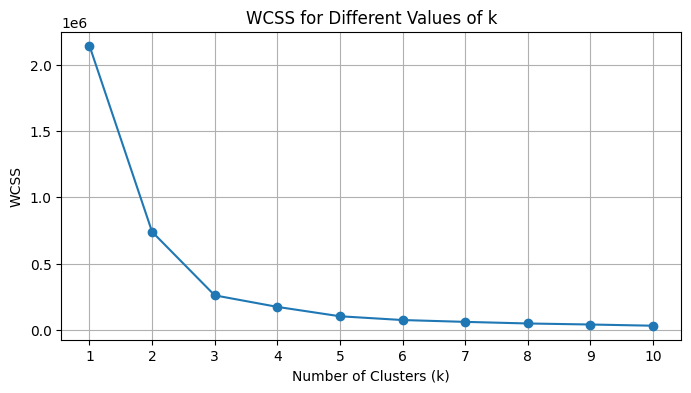

In [ ]:
from sklearn.cluster import KMeans


# Define a range of k values (number of clusters) to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(age_df)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Specify the number of clusters (k)
k = 3

# Initialize the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to your data
kmeans.fit(age_df)

# Assign each data point to a cluster
cluster_labels = kmeans.labels_

# Add the cluster labels to your original DataFrame (if needed)
age_df['cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
age_df

,age,RFM_Score,cluster
0,68,0.1,2
1,44,0.7,0
2,46,0.6,0
3,61,0.5,2
4,64,0.9,2
...,...,...,...
13615,45,0.7,0
13616,28,0.5,1
13617,48,0.9,0
13618,49,0.7,0


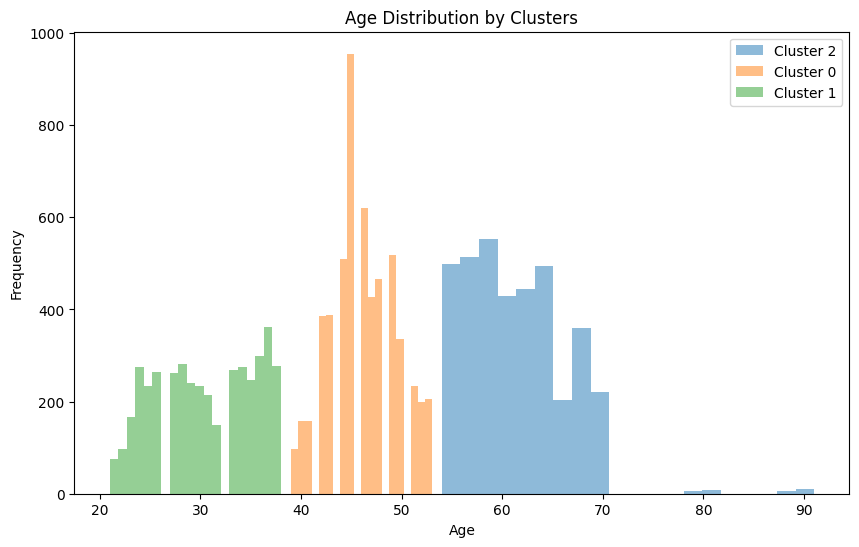

In [ ]:
cluster_stats = age_df.groupby('cluster')['age']

# Create histograms to visualize the distribution of ages within each cluster
plt.figure(figsize=(10, 6))
for cluster in age_df['cluster'].unique():
    cluster_data = age_df[age_df['cluster'] == cluster]['age']
    plt.hist(cluster_data, bins=20, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Age Distribution by Clusters')
plt.show()

In [ ]:
# Based on your interpretation, you can assign labels to clusters
age_cluster_labels = {
    0: 'Young Adults',
    1: 'Middle-Aged',
    2: 'Seniors'
}

# Add a 'cluster_label' column to your DataFrame
age_df['age_cluster_label'] = age_df['cluster'].map(age_cluster_labels)

In [ ]:
age_df.head()

,age,RFM_Score,cluster,age_cluster_label
0,68,0.1,2,Seniors
1,44,0.7,0,Young Adults
2,46,0.6,0,Young Adults
3,61,0.5,2,Seniors
4,64,0.9,2,Seniors


In [ ]:
df['age_group'] = np.where(df['age'] == age_df['age'], age_df['age_cluster_label'],'Super Seniors')

In [ ]:
age_df.to_csv('/content/drive/MyDrive/DA - Internship/age_rfm.csv')

In [ ]:
job_industry_df = df.loc[:, ['job_industry_category', 'RFM_Score ']]
job_industry_df.head()

,job_industry_category,RFM_Score
0,Financial Services,0.1
1,Health,0.7
2,Retail,0.6
3,Financial Services,0.5
4,Property,0.9


In [ ]:
job_industry_df['job_industry_category'].unique()

array(['Financial Services', 'Health', 'Retail', 'Property',
       'Manufacturing', 'Entertainment', 'IT', 'Argiculture',
       'Telecommunications'], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

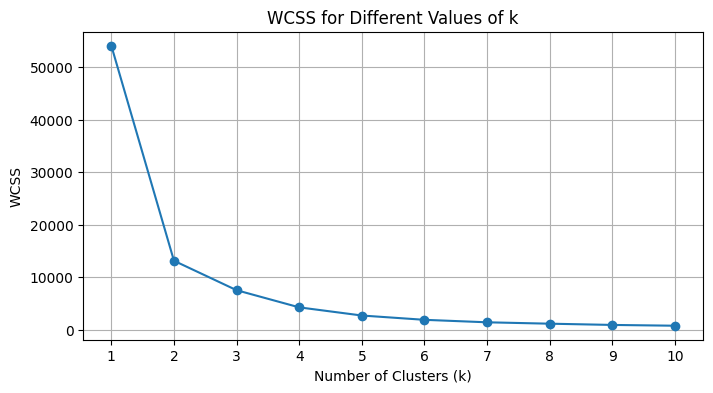

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical column "job category" into numerical format
le = LabelEncoder()
job_industry_df['job_category_encoded'] = le.fit_transform(job_industry_df['job_industry_category'])

# Select the relevant columns for clustering
data_for_clustering = job_industry_df[['job_category_encoded', 'RFM_Score ']]

# Specify the range of k values to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

sns.scatterplot(data=job_industry_df,'job_category_encoded', 'RFM_Score ' ,cmap='virdis', c=cluster.labels)

SyntaxError: ignored

In [ ]:
job_industry_df.head()

,job_industry_category,RFM_Score,job_category_encoded
0,Financial Services,0.1,2
1,Health,0.7,3
2,Retail,0.6,7
3,Financial Services,0.5,2
4,Property,0.9,6


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data_for_clustering = job_industry_df[['job_category_encoded', 'RFM_Score ']]

# Clusters are 2
k = 3

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model with data
kmeans.fit(data_for_clustering)

# Assigning cluster labels to data
job_industry_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
job_industry_df.head()

,job_industry_category,RFM_Score,job_category_encoded,cluster
0,Financial Services,0.1,2,0
1,Health,0.7,3,0
2,Retail,0.6,7,2
3,Financial Services,0.5,2,0
4,Property,0.9,6,2


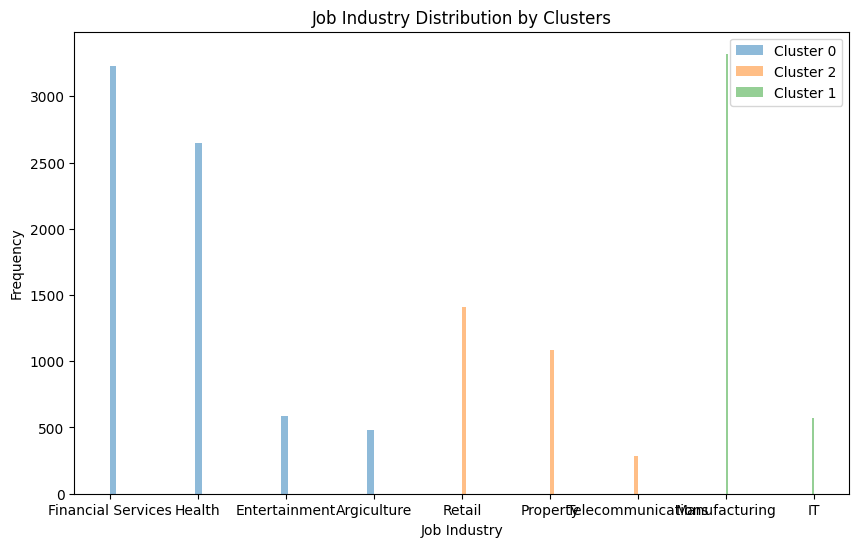

In [ ]:
cluster_stats = job_industry_df.groupby('cluster')['job_industry_category']

# Create histograms to visualize the distribution of ages within each cluster
plt.figure(figsize=(10, 6))
for cluster in job_industry_df['cluster'].unique():
    cluster_data =job_industry_df[job_industry_df['cluster'] == cluster]['job_industry_category']
    plt.hist(cluster_data, bins=40, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Job Industry')
plt.ylabel('Frequency')
plt.legend()
plt.title('Job Industry Distribution by Clusters')
plt.show()

In [ ]:
job_industry_df.to_csv('/content/drive/MyDrive/DA - Internship/job_rfm.csv')

In [ ]:
wealth_segment_df = df.loc[:, ['wealth_segment', 'RFM_Score ']]
wealth_segment_df.head()

,wealth_segment,RFM_Score
0,Mass Customer,0.1
1,Mass Customer,0.7
2,Affluent Customer,0.6
3,Mass Customer,0.5
4,Affluent Customer,0.9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

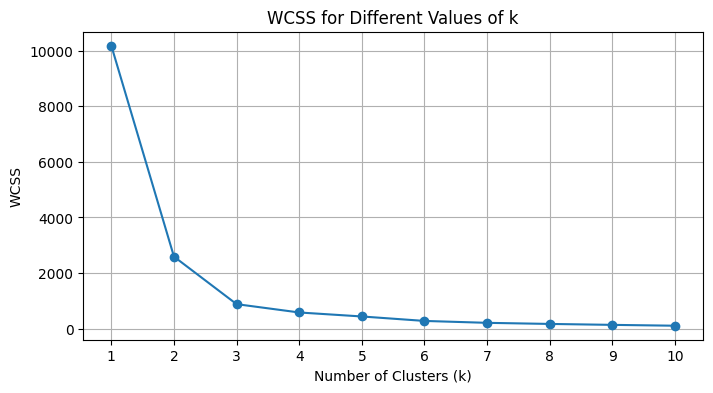

In [ ]:
# Encode the categorical column "wealth segment" into numerical format
le = LabelEncoder()
wealth_segment_df['wealth_segment_encoded'] = le.fit_transform(wealth_segment_df['wealth_segment'])

# Select the relevant columns for clustering
data_for_clustering_w = wealth_segment_df[['wealth_segment_encoded', 'RFM_Score ']]

# Specify the range of k values to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering_w)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data_for_clustering_w = wealth_segment_df[['wealth_segment_encoded', 'RFM_Score ']]

# Clusters are 2
k = 3

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model with data
kmeans.fit(data_for_clustering_w)

# Assigning cluster labels to data
wealth_segment_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
wealth_segment_df.head()

,wealth_segment,RFM_Score,wealth_segment_encoded,cluster
0,Mass Customer,0.1,2,1
1,Mass Customer,0.7,2,1
2,Affluent Customer,0.6,0,2
3,Mass Customer,0.5,2,1
4,Affluent Customer,0.9,0,2


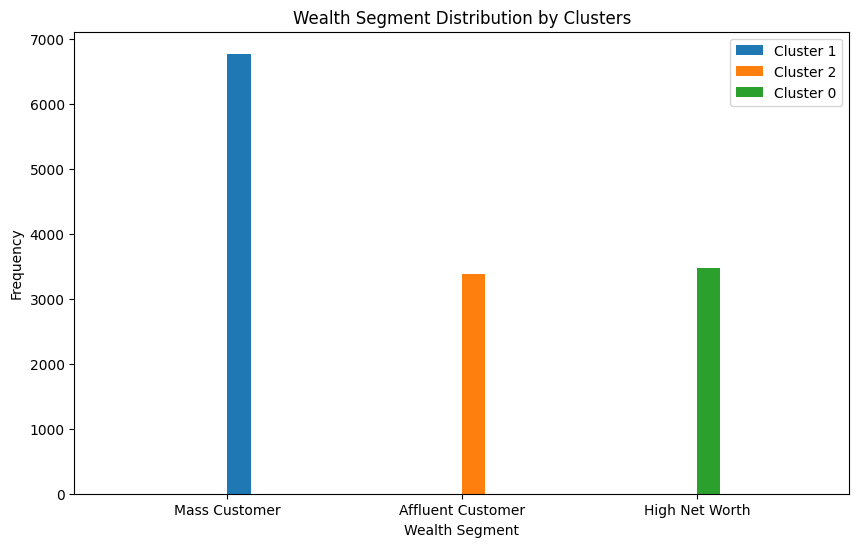

In [ ]:
cluster_stats = wealth_segment_df.groupby('cluster')['wealth_segment']

# Create histograms to visualize the distribution of ages within each cluster
plt.figure(figsize=(10, 6))
for cluster in wealth_segment_df['cluster'].unique():
    cluster_data =wealth_segment_df[wealth_segment_df['cluster'] == cluster]['wealth_segment']
    plt.hist(cluster_data, bins=10, alpha=1, label=f'Cluster {cluster}')
plt.xlabel('Wealth Segment')
plt.ylabel('Frequency')
plt.legend()
plt.title('Wealth Segment Distribution by Clusters')
plt.show()

In [ ]:
wealth_segment_df.to_csv('/content/drive/MyDrive/DA - Internship/wealth_rfm.csv')

In [ ]:
owns_car_df = df.loc[:, ['owns_car', 'RFM_Score ']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

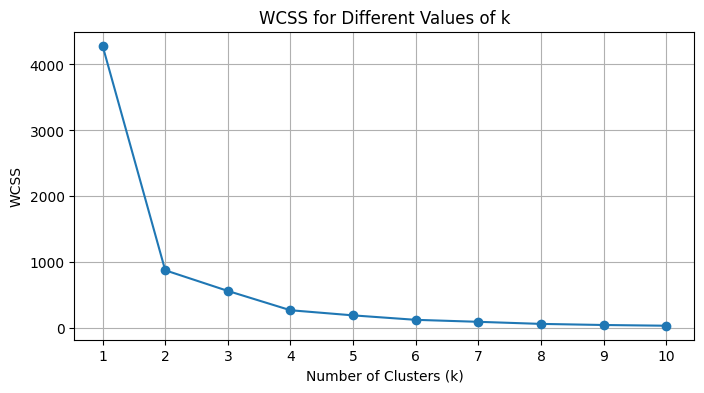

In [ ]:
le = LabelEncoder()
owns_car_df['owns_car_encoded'] = le.fit_transform(owns_car_df['owns_car'])

# Select the relevant columns for clustering
data_for_clustering = owns_car_df[['owns_car_encoded', 'RFM_Score ']]

# Specify the range of k values to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data_for_clustering = owns_car_df[['owns_car_encoded', 'RFM_Score ']]

# Clusters are 2
k = 3

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model with data
kmeans.fit(data_for_clustering)

# Assigning cluster labels to data
owns_car_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
owns_car_df.head()

,owns_car,RFM_Score,owns_car_encoded,cluster
0,Yes,0.1,1,1
1,Yes,0.7,1,1
2,No,0.6,0,0
3,No,0.5,0,2
4,Yes,0.9,1,1


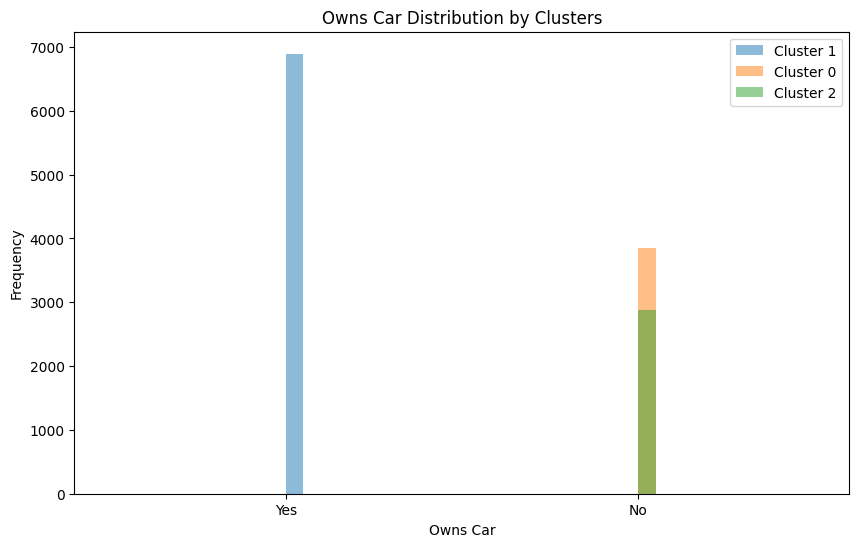

In [ ]:
cluster_stats = owns_car_df.groupby('cluster')['owns_car']

# Create histograms to visualize the distribution of ages within each cluster
plt.figure(figsize=(10, 6))
for cluster in owns_car_df['cluster'].unique():
    cluster_data =owns_car_df[owns_car_df['cluster'] == cluster]['owns_car']
    plt.hist(cluster_data, bins=20, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Owns Car')
plt.ylabel('Frequency')
plt.legend()
plt.title('Owns Car Distribution by Clusters')
plt.show()

In [ ]:
owns_car_df.to_csv('/content/drive/MyDrive/DA - Internship/owns_car_rfm.csv')

In [ ]:
state_df = df.loc[:, ['state', 'RFM_Score ']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

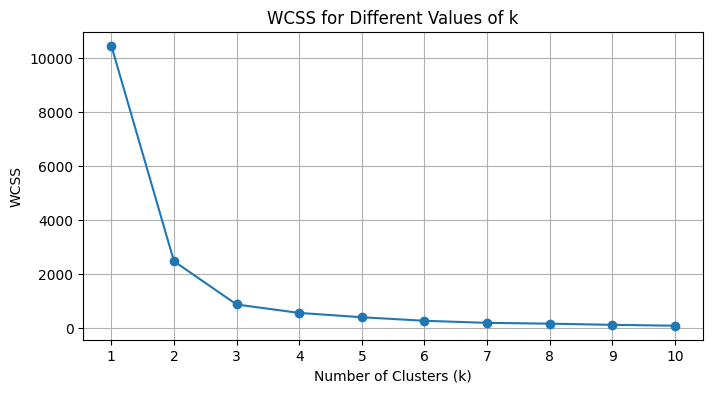

In [ ]:
le = LabelEncoder()
state_df['state_encoded'] = le.fit_transform(state_df['state'])

# Select the relevant columns for clustering
data_for_clustering = state_df[['state_encoded', 'RFM_Score ']]

# Specify the range of k values to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data_for_clustering = state_df[['state_encoded', 'RFM_Score ']]

# Clusters are 2
k = 3

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model with data
kmeans.fit(data_for_clustering)

# Assigning cluster labels to data
state_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
state_df.to_csv('/content/drive/MyDrive/DA - Internship/state_rfm.csv')

In [ ]:
prod_line_df = df.loc[:, ['product_line', 'RFM_Score ']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

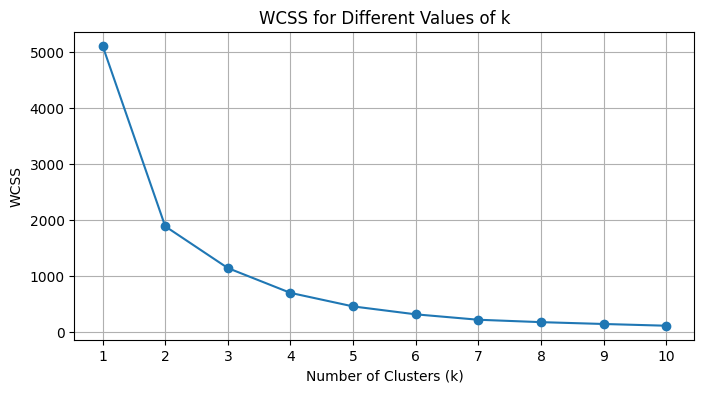

In [ ]:
le = LabelEncoder()
prod_line_df['prod_line_encoded'] = le.fit_transform(prod_line_df['product_line'])

# Select the relevant columns for clustering
data_for_clustering = prod_line_df[['prod_line_encoded', 'RFM_Score ']]

# Specify the range of k values to test
k_values = range(1, 11)
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_clustering)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow point
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data_for_clustering = prod_line_df[['prod_line_encoded', 'RFM_Score ']]

# Clusters are 2
k = 3

# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model with data
kmeans.fit(data_for_clustering)

# Assigning cluster labels to data
state_df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
prod_line_df.to_csv('/content/drive/MyDrive/DA - Internship/production_line_rfm.csv')

In [21]:
df1 = pd.read_excel('/content/drive/MyDrive/DA - Internship/Master Data.xlsx', sheet_name = 'Old Customer Data with RFM')
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,...,list_price,standard_cost,product_first_sold_date,profit,Recency,Frequency,Monetary,RFM_combine,RFM_Score,age_group
0,2950,Kristos,Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10,...,71.49,53.62,2012-12-02,17.87,3,0,0,300,0.1,Seniors
1,3120,Lauree,O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10,...,2091.47,388.92,2014-03-03,1702.55,7,6,6,766,0.7,Young Adults
2,402,Berne,Donegan,Male,9,Desktop Support Technician,Retail,Affluent Customer,No,22,...,1793.43,248.82,1999-07-20,1544.61,4,5,7,457,0.6,Young Adults
3,3135,Titus,Worsall,Male,83,Staff Scientist,Financial Services,Mass Customer,No,16,...,1198.46,381.10,1998-12-16,817.36,1,6,7,167,0.5,Seniors
4,2339,Damien,Haddeston,Male,3,Web Designer II,Property,Affluent Customer,Yes,16,...,1538.99,829.65,2006-11-10,709.34,8,8,8,888,0.9,Seniors


In [ ]:
def customer_rfm_analysis(x):
  data = df1['RFM_combine']
  if x <= '999' & x  >= '888':
    return 'Champion'
  elif x <= '777' & x >= '666':
    return
  elif x <= '790' & x >= '580':
    return 'Loyal customers'
  elif x <= '590' & x >= '070':
    return 'Can\'t Loose Them'

